In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
WA = pd.read_csv("data/WA-children-in-care-numbers-2008-to-2017.csv")
WA["Count"].max()
WA

,id,Indicator,AACC Region,Aboriginality,Age Group,Gender,Count,Year
0,1,Children in care,East Kimberley,NonAboriginal,0 - 17 Years,All,0,2008
1,2,Children in care,East Kimberley,Aboriginal,0 - 17 Years,All,91,2008
2,3,Children in care,Goldfields-Esperance,NonAboriginal,0 - 17 Years,All,34,2008
3,4,Children in care,Goldfields-Esperance,Aboriginal,0 - 17 Years,All,69,2008
4,5,Children in care,Midwest-Gascoyne,Aboriginal,0 - 17 Years,All,94,2008
...,...,...,...,...,...,...,...,...
175,176,Children in care,Western Australia,NonAboriginal,0 - 17 Years,All,2192,2017
176,177,Children in care,Wheatbelt,Aboriginal,0 - 17 Years,All,163,2017
177,178,Children in care,Wheatbelt,NonAboriginal,0 - 17 Years,All,90,2017
178,179,Children in care,West Kimberley,Aboriginal,0 - 17 Years,All,176,2017


In [3]:
 # Assign X (data) and y (target)
X = WA.drop(columns=["id","Indicator", "Age Group", "Gender","Count"], axis=1)
y = WA["Count"]
print(X.shape, y.shape)

(180, 3) (180,)


In [4]:
X=pd.get_dummies(X)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
score=model.score(X_train,y_train)
print(score)

0.9407827762336134


In [8]:
test_score=model.score(X_test,y_test)
print(score)

0.9407827762336134


In [9]:
predict = model.predict(X_train)

In [10]:
predictions = model.predict(X_test)
predictions

array([ 147.45750601,   76.12241734,   62.90384901,  191.10316996,
         27.3972621 ,   -7.881842  ,   99.7299333 ,    6.5121402 ,
        141.08204286,  146.8314898 ,   59.77639644,  120.94349516,
         57.19905574,   62.2778328 ,  -64.19693226,   83.1629547 ,
        -31.59684023, 1910.72677971,   80.58561401,  169.8896081 ,
        155.49562591, 1211.84216313,   76.34337503, 1980.88645451,
         50.78382036,  -17.42381572, 1878.34764537, 1901.73420364,
        216.66272463, 1793.79398838,  -57.1563949 ,   52.73585908,
         70.92236806,  113.9029578 ,   -3.02983353,  207.44919087,
        194.23062254,  103.97217227, 1925.12076191,   86.29040728,
        153.3226295 ,   38.89127454,    5.96274254,  258.68550407,
        -13.63128893])

In [11]:
comparison=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

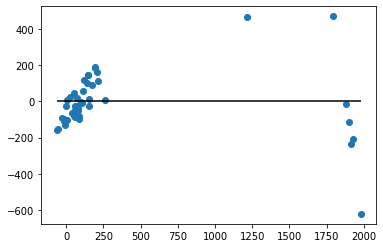

In [12]:
plt.scatter(predictions,predictions-y_test)
plt.hlines(y=0,xmin=predictions.min(),xmax=predictions.max())